<a href="https://colab.research.google.com/github/oo363636/MSBD5013_group_project_2021Spring/blob/main/5013_lightgbm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We load the preprocessing data and train on LightGBM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# !pip install lightgbm -i https://pypi.tuna.tsinghua.edu.cn/simple --default-timeout=100
!pip install mpl_finance 

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
# import matplotlib.finance as mpf
from mpl_finance import candlestick_ohlc
from matplotlib.pylab import date2num, num2date
import datetime
import time


In [ ]:
train_path = '/content/drive/My Drive/5013project/train_data.csv'
test_path = '/content/drive/My Drive/5013project/test_data.csv'
sample_path = '/content/drive/My Drive/5013project/result_format.csv'
model_save_path = '/content/drive/My Drive/5013project/model.pt'

In [ ]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [ ]:
ori_train_path = '/content/drive/My Drive/5013project/training.csv'
training = pd.read_csv(ori_train_path)
training

,id,time,name,Open,High,Low,Close,Volume,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,target
0,1,2018-05-04T08:12:00Z,BTCUSDT,9727.90000,9750.00000,9727.90000,9745.56000,52.086680,507447.897326,454,39.258336,382501.194936,0.005881
1,2,2018-05-04T08:12:00Z,ETHUSDT,789.08000,791.00000,789.08000,790.93000,407.544770,322084.533567,379,303.069270,239530.381621,0.004171
2,3,2018-05-04T08:12:00Z,LTCUSDT,160.70000,161.36000,160.52000,161.06000,208.470510,33554.990241,76,193.770360,31190.987887,0.010191
3,4,2018-05-04T08:12:00Z,XRPUSDT,0.50000,0.50000,0.50000,0.50000,109.510000,54.755000,1,0.000000,0.000000,0.252573
4,5,2018-05-04T08:13:00Z,BTCUSDT,9745.56000,9750.00000,9727.93000,9749.92000,32.882566,320490.457569,486,21.424235,208845.957751,0.005537
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892860,4892861,2020-09-02T21:08:00Z,XRPUSDT,0.27575,0.27584,0.27575,0.27580,66498.000000,18340.016959,47,58288.400000,16075.858140,0.000870
4892861,4892862,2020-09-02T21:09:00Z,BTCUSDT,11351.19000,11352.67000,11350.08000,11352.66000,17.136152,194520.595922,301,8.439870,95803.206931,0.000147
4892862,4892863,2020-09-02T21:09:00Z,ETHUSDT,435.15000,435.34000,435.10000,435.33000,234.930260,102233.160894,110,181.816990,79117.769437,0.001534
4892863,4892864,2020-09-02T21:09:00Z,LTCUSDT,57.98000,58.05000,57.98000,58.04000,155.613770,9027.252008,28,152.271390,8833.316260,0.002030


In [ ]:
btc_training = training[['time', 'Open', 'High', 'Low', 'Close']][training['name'] == 'BTCUSDT']
btc_training

,time,Open,High,Low,Close
0,2018-05-04T08:12:00Z,9727.90,9750.00,9727.90,9745.56
4,2018-05-04T08:13:00Z,9745.56,9750.00,9727.93,9749.92
8,2018-05-04T08:14:00Z,9749.93,9780.00,9747.23,9780.00
12,2018-05-04T08:15:00Z,9780.00,9800.07,9770.38,9780.00
16,2018-05-04T08:16:00Z,9780.00,9786.20,9750.00,9765.63
...,...,...,...,...,...
4892845,2020-09-02T21:05:00Z,11339.52,11343.70,11338.73,11341.87
4892849,2020-09-02T21:06:00Z,11341.87,11343.99,11341.87,11343.35
4892853,2020-09-02T21:07:00Z,11343.34,11352.41,11343.34,11350.53
4892857,2020-09-02T21:08:00Z,11350.54,11352.42,11350.52,11351.18


In [ ]:
import time
# btc_training['new'] = pd.to_datetime('2018-05-04T08:12:00Z',format='%Y-%m-%d %H:%M:%S')
btc_training['new'] = pd.to_datetime(btc_training['time'],format="%Y-%m-%dT%H:%M:%S")
btc_training['date'] = btc_training['new'].dt.strftime("%Y-%m-%d %H:%M:%S")
btc_training

,time,Open,High,Low,Close,new,date
0,2018-05-04T08:12:00Z,9727.90,9750.00,9727.90,9745.56,2018-05-04 08:12:00+00:00,2018-05-04 08:12:00
4,2018-05-04T08:13:00Z,9745.56,9750.00,9727.93,9749.92,2018-05-04 08:13:00+00:00,2018-05-04 08:13:00
8,2018-05-04T08:14:00Z,9749.93,9780.00,9747.23,9780.00,2018-05-04 08:14:00+00:00,2018-05-04 08:14:00
12,2018-05-04T08:15:00Z,9780.00,9800.07,9770.38,9780.00,2018-05-04 08:15:00+00:00,2018-05-04 08:15:00
16,2018-05-04T08:16:00Z,9780.00,9786.20,9750.00,9765.63,2018-05-04 08:16:00+00:00,2018-05-04 08:16:00
...,...,...,...,...,...,...,...
4892845,2020-09-02T21:05:00Z,11339.52,11343.70,11338.73,11341.87,2020-09-02 21:05:00+00:00,2020-09-02 21:05:00
4892849,2020-09-02T21:06:00Z,11341.87,11343.99,11341.87,11343.35,2020-09-02 21:06:00+00:00,2020-09-02 21:06:00
4892853,2020-09-02T21:07:00Z,11343.34,11352.41,11343.34,11350.53,2020-09-02 21:07:00+00:00,2020-09-02 21:07:00
4892857,2020-09-02T21:08:00Z,11350.54,11352.42,11350.52,11351.18,2020-09-02 21:08:00+00:00,2020-09-02 21:08:00


In [ ]:
btc_training

,time,Open,High,Low,Close,new,date
0,2018-05-04T08:12:00Z,9727.90,9750.00,9727.90,9745.56,2018-05-04 08:12:00+00:00,2018-05-04 08:12
4,2018-05-04T08:13:00Z,9745.56,9750.00,9727.93,9749.92,2018-05-04 08:13:00+00:00,2018-05-04 08:13
8,2018-05-04T08:14:00Z,9749.93,9780.00,9747.23,9780.00,2018-05-04 08:14:00+00:00,2018-05-04 08:14
12,2018-05-04T08:15:00Z,9780.00,9800.07,9770.38,9780.00,2018-05-04 08:15:00+00:00,2018-05-04 08:15
16,2018-05-04T08:16:00Z,9780.00,9786.20,9750.00,9765.63,2018-05-04 08:16:00+00:00,2018-05-04 08:16
...,...,...,...,...,...,...,...
4892845,2020-09-02T21:05:00Z,11339.52,11343.70,11338.73,11341.87,2020-09-02 21:05:00+00:00,2020-09-02 21:05
4892849,2020-09-02T21:06:00Z,11341.87,11343.99,11341.87,11343.35,2020-09-02 21:06:00+00:00,2020-09-02 21:06
4892853,2020-09-02T21:07:00Z,11343.34,11352.41,11343.34,11350.53,2020-09-02 21:07:00+00:00,2020-09-02 21:07
4892857,2020-09-02T21:08:00Z,11350.54,11352.42,11350.52,11351.18,2020-09-02 21:08:00+00:00,2020-09-02 21:08


In [ ]:
btc_training =  btc_training.reset_index(drop=True)
btc_training

,time,Open,High,Low,Close,new,date
0,2018-05-04T08:12:00Z,9727.90,9750.00,9727.90,9745.56,2018-05-04 08:12:00+00:00,2018-05-04 08:12:00
1,2018-05-04T08:13:00Z,9745.56,9750.00,9727.93,9749.92,2018-05-04 08:13:00+00:00,2018-05-04 08:13:00
2,2018-05-04T08:14:00Z,9749.93,9780.00,9747.23,9780.00,2018-05-04 08:14:00+00:00,2018-05-04 08:14:00
3,2018-05-04T08:15:00Z,9780.00,9800.07,9770.38,9780.00,2018-05-04 08:15:00+00:00,2018-05-04 08:15:00
4,2018-05-04T08:16:00Z,9780.00,9786.20,9750.00,9765.63,2018-05-04 08:16:00+00:00,2018-05-04 08:16:00
...,...,...,...,...,...,...,...
1223211,2020-09-02T21:05:00Z,11339.52,11343.70,11338.73,11341.87,2020-09-02 21:05:00+00:00,2020-09-02 21:05:00
1223212,2020-09-02T21:06:00Z,11341.87,11343.99,11341.87,11343.35,2020-09-02 21:06:00+00:00,2020-09-02 21:06:00
1223213,2020-09-02T21:07:00Z,11343.34,11352.41,11343.34,11350.53,2020-09-02 21:07:00+00:00,2020-09-02 21:07:00
1223214,2020-09-02T21:08:00Z,11350.54,11352.42,11350.52,11351.18,2020-09-02 21:08:00+00:00,2020-09-02 21:08:00


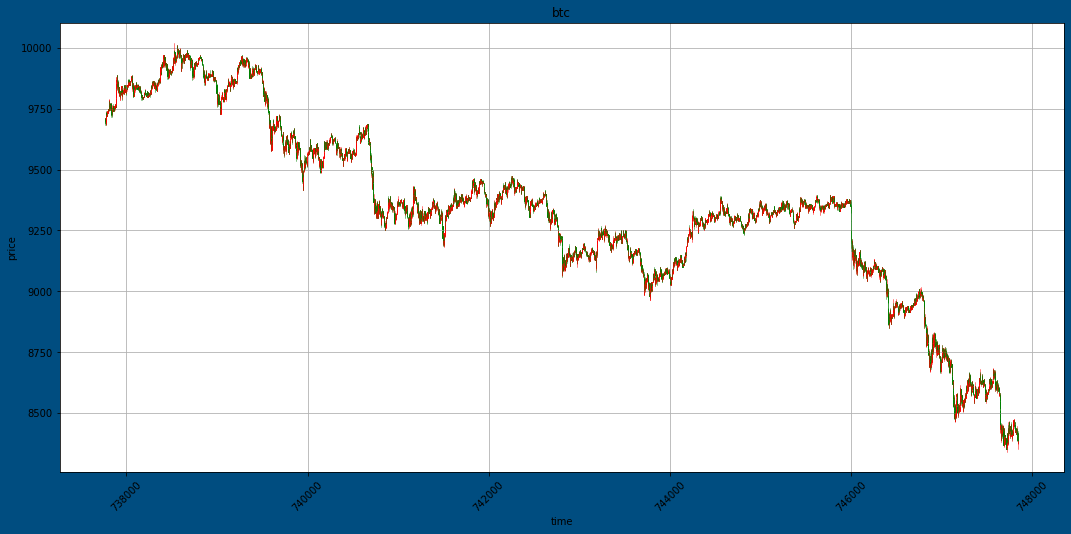

In [ ]:
quotes = []
for row in range(948,11028): #948,2388
  if row == 0:
    sdate = str(btc_training.loc[row,'date']) # 注意：loc返回数值，iloc返回dataframe
    sdate_num = date2num(datetime.datetime.strptime(sdate,'%Y-%m-%d %H:%M:%S')) #日期需要特定形式，这里进行转换
    sdate_plt = sdate_num
  else:
    sdate_plt = sdate_num + row

  sopen = btc_training.loc[row,'Open']
  shigh = btc_training.loc[row,'High']
  slow = btc_training.loc[row,'Low']
  sclose = btc_training.loc[row,'Close']
  datas = (sdate_plt,sopen,shigh,slow,sclose) # 按照 candlestick_ohlc 要求的数据结构准备数据
  quotes.append(datas)

fig, ax = plt.subplots(facecolor=(0, 0.3, 0.5),figsize=(18,8))
fig.subplots_adjust(bottom=0.1)
# ax.xaxis_date()
plt.xticks(rotation=45) #日期显示的旋转角度
plt.title('btc')
plt.xlabel('time')
plt.ylabel('price')
candlestick_ohlc(ax,quotes,width=0.7,colorup='r',colordown='green') # 上涨为红色K线，下跌为绿色，K线宽度为0.7
plt.grid(True)

In [ ]:
eth_training = training[['time', 'Open', 'High', 'Low', 'Close']][training['name'] == 'ETHUSDT']
eth_training['new'] = pd.to_datetime(eth_training['time'],format="%Y-%m-%dT%H:%M:%S")
eth_training['date'] = eth_training['new'].dt.strftime("%Y-%m-%d %H:%M:%S")
eth_training =  eth_training.reset_index(drop=True)

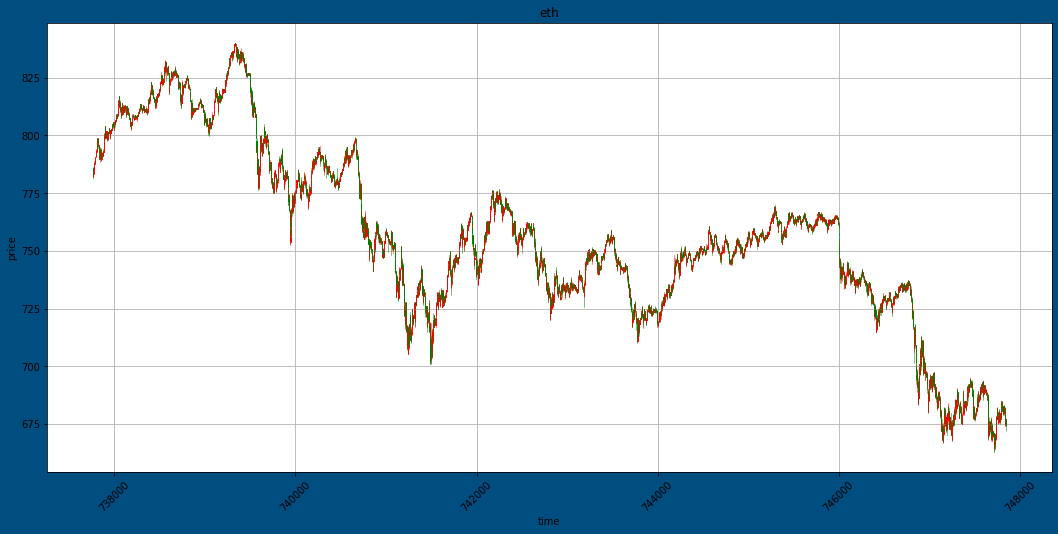

In [ ]:
quotes = []
for row in range(948,11028):
  if row == 0:
    sdate = str(eth_training.loc[row,'date']) # 注意：loc返回数值，iloc返回dataframe
    sdate_num = date2num(datetime.datetime.strptime(sdate,'%Y-%m-%d %H:%M:%S')) #日期需要特定形式，这里进行转换
    sdate_plt = sdate_num
  else:
    sdate_plt = sdate_num + row

  sopen = eth_training.loc[row,'Open']
  shigh = eth_training.loc[row,'High']
  slow = eth_training.loc[row,'Low']
  sclose = eth_training.loc[row,'Close']
  datas = (sdate_plt,sopen,shigh,slow,sclose) # 按照 candlestick_ohlc 要求的数据结构准备数据
  quotes.append(datas)

fig, ax = plt.subplots(facecolor=(0, 0.3, 0.5),figsize=(18,8))
fig.subplots_adjust(bottom=0.1)
# ax.xaxis_date()
plt.xticks(rotation=45) #日期显示的旋转角度
plt.title('eth')
plt.xlabel('time')
plt.ylabel('price')
candlestick_ohlc(ax,quotes,width=0.7,colorup='r',colordown='green') # 上涨为红色K线，下跌为绿色，K线宽度为0.7
plt.grid(True)

In [ ]:
train_data

,month,day,hour,min,name,Open,High,Low,Close,Volume,Quote.asset.volume,Number.of.trades,Taker.buy.base.asset.volume,target
0,5,4,8,12,1,9727.90000,9750.00000,9727.90000,9745.56000,52.086680,507447.897326,454,39.258336,0.005881
1,5,4,8,12,2,789.08000,791.00000,789.08000,790.93000,407.544770,322084.533567,379,303.069270,0.004171
2,5,4,8,12,3,160.70000,161.36000,160.52000,161.06000,208.470510,33554.990241,76,193.770360,0.010191
3,5,4,8,12,4,0.50000,0.50000,0.50000,0.50000,109.510000,54.755000,1,0.000000,0.252573
4,5,4,8,13,1,9745.56000,9750.00000,9727.93000,9749.92000,32.882566,320490.457569,486,21.424235,0.005537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892860,9,2,21,8,4,0.27575,0.27584,0.27575,0.27580,66498.000000,18340.016959,47,58288.400000,0.000870
4892861,9,2,21,9,1,11351.19000,11352.67000,11350.08000,11352.66000,17.136152,194520.595922,301,8.439870,0.000147
4892862,9,2,21,9,2,435.15000,435.34000,435.10000,435.33000,234.930260,102233.160894,110,181.816990,0.001534
4892863,9,2,21,9,3,57.98000,58.05000,57.98000,58.04000,155.613770,9027.252008,28,152.271390,0.002030


In [ ]:
test_data

,month,day,hour,min,name,Open,High,Low,Close,Volume,Quote.asset.volume,Number.of.trades,Taker.buy.base.asset.volume,target
0,9,2,21,10,1,11352.67000,11353.73000,11351.93000,11353.11000,1.326513e+01,1.505980e+05,271,7.588199e+00,0
1,9,2,21,10,2,435.35000,435.50000,435.33000,435.48000,1.908099e+02,8.307275e+04,92,1.178085e+02,0
2,9,2,21,10,3,58.04000,58.05000,58.02000,58.04000,1.476529e+02,8.568444e+03,38,5.848185e+01,0
3,9,2,21,10,4,0.27583,0.27584,0.27582,0.27582,1.276450e+04,3.520818e+03,14,1.034870e+04,0
4,9,2,21,11,1,11353.33000,11353.57000,11352.01000,11353.24000,1.253780e+01,1.423419e+05,302,4.032412e+00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862608,1,30,21,9,4,0.39345,0.39401,0.38852,0.39041,3.176789e+06,1.239964e+06,1405,1.413193e+06,0
862609,1,30,21,10,1,34171.14000,34181.40000,34145.18000,34176.09000,3.091734e+01,1.056205e+06,740,1.788561e+01,0
862610,1,30,21,10,2,1375.69000,1375.72000,1374.38000,1374.99000,2.701940e+02,3.714904e+05,593,9.380296e+01,0
862611,1,30,21,10,3,133.12000,133.14000,133.03000,133.10000,1.639941e+02,2.182161e+04,60,1.555211e+01,0


In [ ]:
y_train_data = train_data['target']
y_train_data

0          0.005881
1          0.004171
2          0.010191
3          0.252573
4          0.005537
             ...   
4892860    0.000870
4892861    0.000147
4892862    0.001534
4892863    0.002030
4892864    0.000815
Name: target, Length: 4892865, dtype: float64

In [ ]:
X_train_data = train_data.iloc[:, 0:13]
X_train_data

,month,day,hour,min,name,Open,High,Low,Close,Volume,Quote.asset.volume,Number.of.trades,Taker.buy.base.asset.volume
0,5,4,8,12,1,9727.90000,9750.00000,9727.90000,9745.56000,52.086680,507447.897326,454,39.258336
1,5,4,8,12,2,789.08000,791.00000,789.08000,790.93000,407.544770,322084.533567,379,303.069270
2,5,4,8,12,3,160.70000,161.36000,160.52000,161.06000,208.470510,33554.990241,76,193.770360
3,5,4,8,12,4,0.50000,0.50000,0.50000,0.50000,109.510000,54.755000,1,0.000000
4,5,4,8,13,1,9745.56000,9750.00000,9727.93000,9749.92000,32.882566,320490.457569,486,21.424235
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4892860,9,2,21,8,4,0.27575,0.27584,0.27575,0.27580,66498.000000,18340.016959,47,58288.400000
4892861,9,2,21,9,1,11351.19000,11352.67000,11350.08000,11352.66000,17.136152,194520.595922,301,8.439870
4892862,9,2,21,9,2,435.15000,435.34000,435.10000,435.33000,234.930260,102233.160894,110,181.816990
4892863,9,2,21,9,3,57.98000,58.05000,57.98000,58.04000,155.613770,9027.252008,28,152.271390


In [ ]:
# train dev split
X_train, X_dev, y_train, y_dev = train_test_split(X_train_data, y_train_data, test_size=0.002, random_state=6666)

In [ ]:
X_train
# y_train

,month,day,hour,min,name,Open,High,Low,Close,Volume,Quote.asset.volume,Number.of.trades,Taker.buy.base.asset.volume
3694653,2,7,5,40,1,9763.00000,9773.66000,9748.02000,9771.30000,121.591838,1.186456e+06,1347,41.505021
2670095,8,12,20,20,3,85.81000,85.81000,85.81000,85.81000,0.000000,0.000000e+00,0,0.000000
2727730,8,23,4,28,2,191.21000,191.66000,191.21000,191.47000,680.829700,1.303680e+05,214,155.711830
3820336,2,29,8,12,4,0.23861,0.23868,0.23858,0.23859,15065.000000,3.594991e+03,28,13093.500000
4635861,7,20,6,19,1,9185.27000,9185.90000,9185.22000,9185.86000,11.159563,1.025077e+05,273,3.621512
...,...,...,...,...,...,...,...,...,...,...,...,...,...
967021,10,20,4,15,1,6544.55000,6545.57000,6543.57000,6543.82000,5.607741,3.670027e+04,93,2.264856
3226799,11,17,22,17,3,59.73000,59.73000,59.72000,59.72000,53.094380,3.170798e+03,5,6.830740
4104574,4,18,18,39,2,182.49000,182.52000,182.23000,182.27000,460.630270,8.402789e+04,140,60.033680
4313753,5,25,4,43,1,8793.74000,8795.00000,8791.35000,8792.44000,11.948883,1.050657e+05,373,5.879463


In [ ]:
y_test_data = test_data['target']
X_test_data = test_data.iloc[:, 0:13]
# X_test_data

In [ ]:
# 用了train test split
lgb_train = lgb.Dataset(X_train, y_train) 
lgb_eval = lgb.Dataset(X_dev, y_dev, reference=lgb_train)

In [ ]:
# params = {
#         'task': 'train',  # 执行的任务类型
#         'boosting_type': 'gbrt',  # 基学习器
#         'objective': 'regression',  # 
#         'metric': 'ndcg',  # 度量的指标(评估函数)
#         'max_position': 10,  # NDCG 位置优化
#         'metric_freq': 1,  # 每隔多少次输出一次度量结果
#         'train_metric': True,  # 训练时就输出度量结果
#         'ndcg_at': [10],
#         'max_bin': 255,  # 一个整数，表示最大的桶的数量。默认值为 255。lightgbm 会根据它来自动压缩内存。如max_bin=255 时，则lightgbm 将使用uint8 来表示特征的每一个值。
#         'num_iterations': 200,  # 迭代次数，即生成的树的棵数
#         'learning_rate': 0.01,  # 学习率
#         'num_leaves': 31,  # 叶子数
#         # 'max_depth':6,
#         'tree_learner': 'serial',  # 用于并行学习，‘serial’： 单台机器的tree learner
#         'min_data_in_leaf': 30,  # 一个叶子节点上包含的最少样本数量
#         'verbose': 2  # 显示训练时的信息
#     }

In [ ]:
params = {
        'task': 'train',
        'objective': 'regression',
        'metric': 'rmse',
        'learning_rate': 0.0005,
        'num_leaves': 31,
        'feature_fraction': 0.9,
        'bagging_fraction': 0.8,
        'bagging_freq': 5,
      }
# clf = lgb.train(params, lgb_train)
# gbm = lgb.train(params, lgb_train)

In [ ]:
print('Start training...')
# gbm = lgb.train(params, lgb_train, num_boost_round=200, valid_sets=lgb_eval, early_stopping_rounds=10)  #
#gbm = lgb.train(params, lgb_train, num_boost_round=2000, valid_sets=lgb_eval, early_stopping_rounds=20)  # 508  0.00316606
gbm = lgb.train(params, lgb_train, num_boost_round=8000, valid_sets=lgb_eval)  #0.00425(lr=0.05)
# gbm = lgb.train(params, lgb_train, num_boost_round=12000, valid_sets=lgb_eval)  # 0.00314144(5k),0.00306051(8k),0.00302394(8k),  689(12000)

流式输出内容被截断，只能显示最后 5000 行内容。
[2995]	valid_0's rmse: 0.00316253
[2996]	valid_0's rmse: 0.00316254
[2997]	valid_0's rmse: 0.00316255
[2998]	valid_0's rmse: 0.00316256
[2999]	valid_0's rmse: 0.00316257
[3000]	valid_0's rmse: 0.00316257
[3001]	valid_0's rmse: 0.00316257
[3002]	valid_0's rmse: 0.00316256
[3003]	valid_0's rmse: 0.00316255
[3004]	valid_0's rmse: 0.00316257
[3005]	valid_0's rmse: 0.00316255
[3006]	valid_0's rmse: 0.00316255
[3007]	valid_0's rmse: 0.00316254
[3008]	valid_0's rmse: 0.00316254
[3009]	valid_0's rmse: 0.00316254
[3010]	valid_0's rmse: 0.00316254
[3011]	valid_0's rmse: 0.00316254
[3012]	valid_0's rmse: 0.00316254
[3013]	valid_0's rmse: 0.00316254
[3014]	valid_0's rmse: 0.00316254
[3015]	valid_0's rmse: 0.00316253
[3016]	valid_0's rmse: 0.00316254
[3017]	valid_0's rmse: 0.00316255
[3018]	valid_0's rmse: 0.00316255
[3019]	valid_0's rmse: 0.00316256
[3020]	valid_0's rmse: 0.00316256
[3021]	valid_0's rmse: 0.00316258
[3022]	valid_0's rmse: 0.00316259
[3023]	valid_0's rmse

In [ ]:
# 没用train test split，用全部数据跑一遍
# lgb_train_new = lgb.Dataset(X_train_data, y_train_data)
# lgb_eval_new = lgb.Dataset(X_test_data, y_test_data, reference=lgb_train_new)
# gbm_new = lgb.train(params, lgb_train_new, num_boost_round=1200)

In [ ]:
gbm.save_model(model_save_path)

In [ ]:
predict_y = gbm.predict(X_test_data)
# predict_y = gbm_new.predict(X_test_data)
print(predict_y)

[4.91236478e-05 4.66290775e-05 4.50814870e-05 ... 2.71738469e-05
 2.26981254e-05 1.73862888e-04]


In [ ]:
test_data['Predicted'] = predict_y

In [ ]:
test_data['Id'] = test_data.index

In [ ]:
test_data

,month,day,hour,min,name,Open,High,Low,Close,Volume,Quote.asset.volume,Number.of.trades,Taker.buy.base.asset.volume,target,Predicted,Id
0,9,2,21,10,1,11352.67000,11353.73000,11351.93000,11353.11000,1.326513e+01,1.505980e+05,271,7.588199e+00,0,-0.000130,0
1,9,2,21,10,2,435.35000,435.50000,435.33000,435.48000,1.908099e+02,8.307275e+04,92,1.178085e+02,0,0.000314,1
2,9,2,21,10,3,58.04000,58.05000,58.02000,58.04000,1.476529e+02,8.568444e+03,38,5.848185e+01,0,0.000161,2
3,9,2,21,10,4,0.27583,0.27584,0.27582,0.27582,1.276450e+04,3.520818e+03,14,1.034870e+04,0,0.000017,3
4,9,2,21,11,1,11353.33000,11353.57000,11352.01000,11353.24000,1.253780e+01,1.423419e+05,302,4.032412e+00,0,-0.000331,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862608,1,30,21,9,4,0.39345,0.39401,0.38852,0.39041,3.176789e+06,1.239964e+06,1405,1.413193e+06,0,0.002433,862608
862609,1,30,21,10,1,34171.14000,34181.40000,34145.18000,34176.09000,3.091734e+01,1.056205e+06,740,1.788561e+01,0,-0.013598,862609
862610,1,30,21,10,2,1375.69000,1375.72000,1374.38000,1374.99000,2.701940e+02,3.714904e+05,593,9.380296e+01,0,-0.005158,862610
862611,1,30,21,10,3,133.12000,133.14000,133.03000,133.10000,1.639941e+02,2.182161e+04,60,1.555211e+01,0,-0.002220,862611


In [ ]:
# submit_data = pd.read_csv(sample_path)
submit_data = test_data.iloc[:, 15:17]
submit_data['Id'] = submit_data.index + 4892866
submit_data['Predicted'] = test_data.loc[:, 'Predicted']
submit_data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,Id,Predicted
0,4892866,0.000049
1,4892867,0.000047
2,4892868,0.000045
3,4892869,0.000046
4,4892870,0.000049
...,...,...
862608,5755474,0.000195
862609,5755475,-0.000092
862610,5755476,0.000027
862611,5755477,0.000023


In [ ]:
# submit_data.to_csv(sample_path) 
submit_data.to_csv(sample_path, index=False)

In [ ]:
# import lightgbm as lgb
# lgb_train = lgb.Dataset(X_train, y_train) 
# lgb_eval = lgb.Dataset(X_dev, y_dev, reference=lgb_train)
# params = {
#         'task': 'train',
#         'objective': 'regression',
#         'metric': 'rmse',
#         'learning_rate': 0.0005,
#         'num_leaves': 31,
#         'feature_fraction': 0.9,
#         'bagging_fraction': 0.8,
#         'bagging_freq': 5,
#       }
# gbm = lgb.train(params, lgb_train, num_boost_round=8000, valid_sets=lgb_eval)
# predict_y = gbm.predict(X_test_data)

In [ ]:
# bst = lgb.Booster(model_file=model_save_path)
# bst